In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar_OP130_Resultat_Global_v
0,153.5,153.87,165.1,111.47,12.10,12.25,0.41,11.97,6.41,24.86,18.1,103.98,6.40,1
1,157.8,154.41,160.0,112.82,11.90,12.33,NaN,11.98,6.62,24.32,13.2,90.52,6.61,1
2,169.1,146.63,168.7,109.16,11.85,12.33,0.31,11.97,6.60,24.24,11.4,101.09,6.61,1
3,158.4,144.41,144.4,110.56,11.87,12.28,0.38,11.97,6.61,24.64,15.2,97.22,6.61,1
4,173.3,162.19,161.7,111.25,11.90,12.17,NaN,11.97,6.62,24.24,23.5,89.35,6.61,1


### Checking Data Quality

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34012 entries, 0 to 34011
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            34012 non-null  float64
 1   OP090_SnapRingPeakForce_value    34012 non-null  float64
 2   OP070_V_2_angle_value            34012 non-null  float64
 3   OP120_Rodage_I_mesure_value      34012 non-null  float64
 4   OP090_SnapRingFinalStroke_value  34012 non-null  float64
 5   OP110_Vissage_M8_torque_value    34012 non-null  float64
 6   OP100_Capuchon_insertion_mesure  15593 non-null  float64
 7   OP120_Rodage_U_mesure_value      34012 non-null  float64
 8   OP070_V_1_torque_value           34012 non-null  float64
 9   OP090_StartLinePeakForce_value   34012 non-null  float64
 10  OP110_Vissage_M8_angle_value     34012 non-null  float64
 11  OP090_SnapRingMidPointForce_val  34012 non-null  float64
 12  OP070_V_2_torque_v

In [4]:
df.OP100_Capuchon_insertion_mesure.isnull().sum()/len(df)

0.5415441608843937

The variables have the right data types and most of them have no missing values. The `OP100_Capuchon_insertion_measure` has about 54% missing values. Does this have any correlation with the work benches with defects?

In [5]:
temp = df.copy()
temp['missing_capuchon'] = temp['OP100_Capuchon_insertion_mesure'].isnull()
temp.groupby('Binar_OP130_Resultat_Global_v')['missing_capuchon'].value_counts(normalize=True).unstack('Binar_OP130_Resultat_Global_v')

Binar_OP130_Resultat_Global_v,1,2
missing_capuchon,,
False,0.45677,0.649832
True,0.54323,0.350168


The work bench with defects have a fewer percentage of missing values but this difference doesn't seem to be significant.

### Exploring the Data
#### Univariate Analysis

In [6]:
df.describe()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar_OP130_Resultat_Global_v
count,34012.000000,34012.000000,34012.000000,34012.000000,34012.000000,34012.000000,15593.000000,34012.000000,34012.000000,34012.000000,34012.000000,34012.000000,34012.000000,34012.000000
mean,159.865721,156.899850,159.606089,113.367532,11.969161,12.256391,0.388300,11.971027,6.548611,23.626152,17.868835,97.667566,6.550982,1.008732
std,15.688236,11.382365,15.092304,3.521831,0.204915,0.090975,0.024391,0.003047,0.097519,2.558111,6.738709,6.886753,0.094743,0.093039
min,101.800000,0.000000,82.000000,100.220000,0.000000,0.570000,0.240000,11.970000,5.670000,0.000000,0.000000,0.000000,5.740000,1.000000
25%,148.600000,149.150000,149.400000,111.070000,11.850000,12.210000,0.380000,11.970000,6.410000,22.270000,13.500000,94.280000,6.420000,1.000000
50%,158.000000,156.180000,158.700000,113.180000,12.040000,12.250000,0.390000,11.970000,6.610000,23.870000,16.400000,98.470000,6.610000,1.000000
75%,169.300000,164.412500,168.900000,115.400000,12.080000,12.300000,0.410000,11.970000,6.620000,25.290000,20.100000,102.220000,6.610000,1.000000
max,198.300000,194.120000,198.100000,186.310000,12.190000,12.500000,0.420000,11.990000,6.670000,43.410000,84.600000,133.550000,6.680000,2.000000


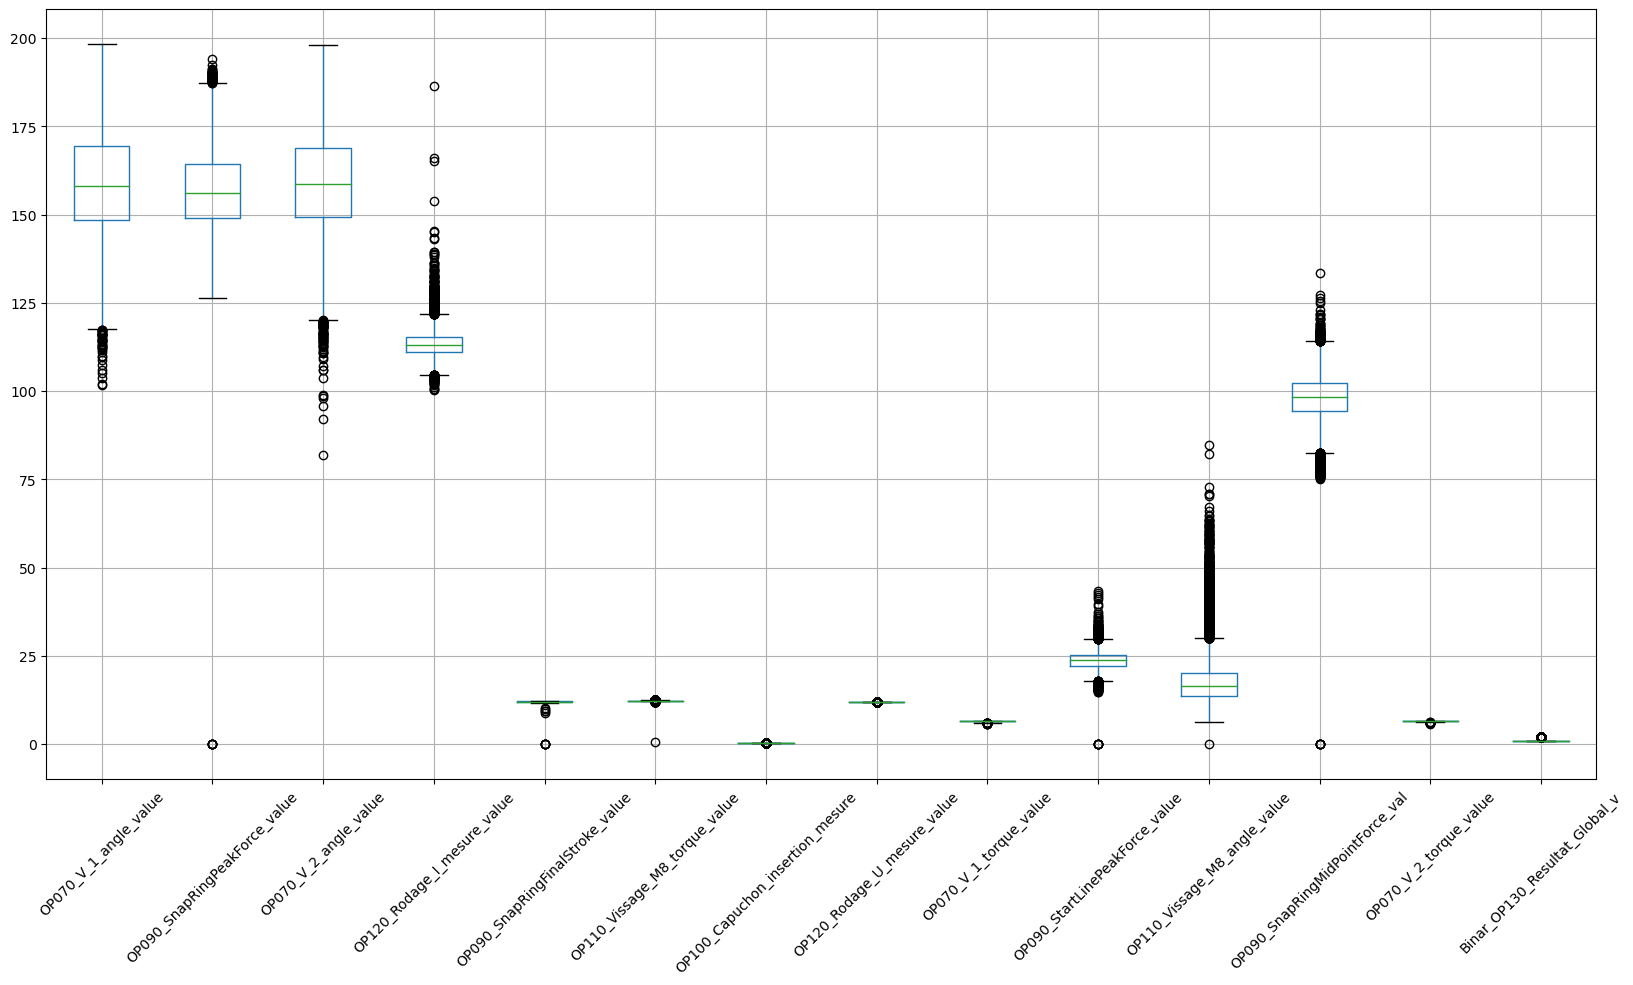

In [7]:
df.boxplot(figsize=(20, 10))
plt.xticks(rotation = 45)
plt.show();

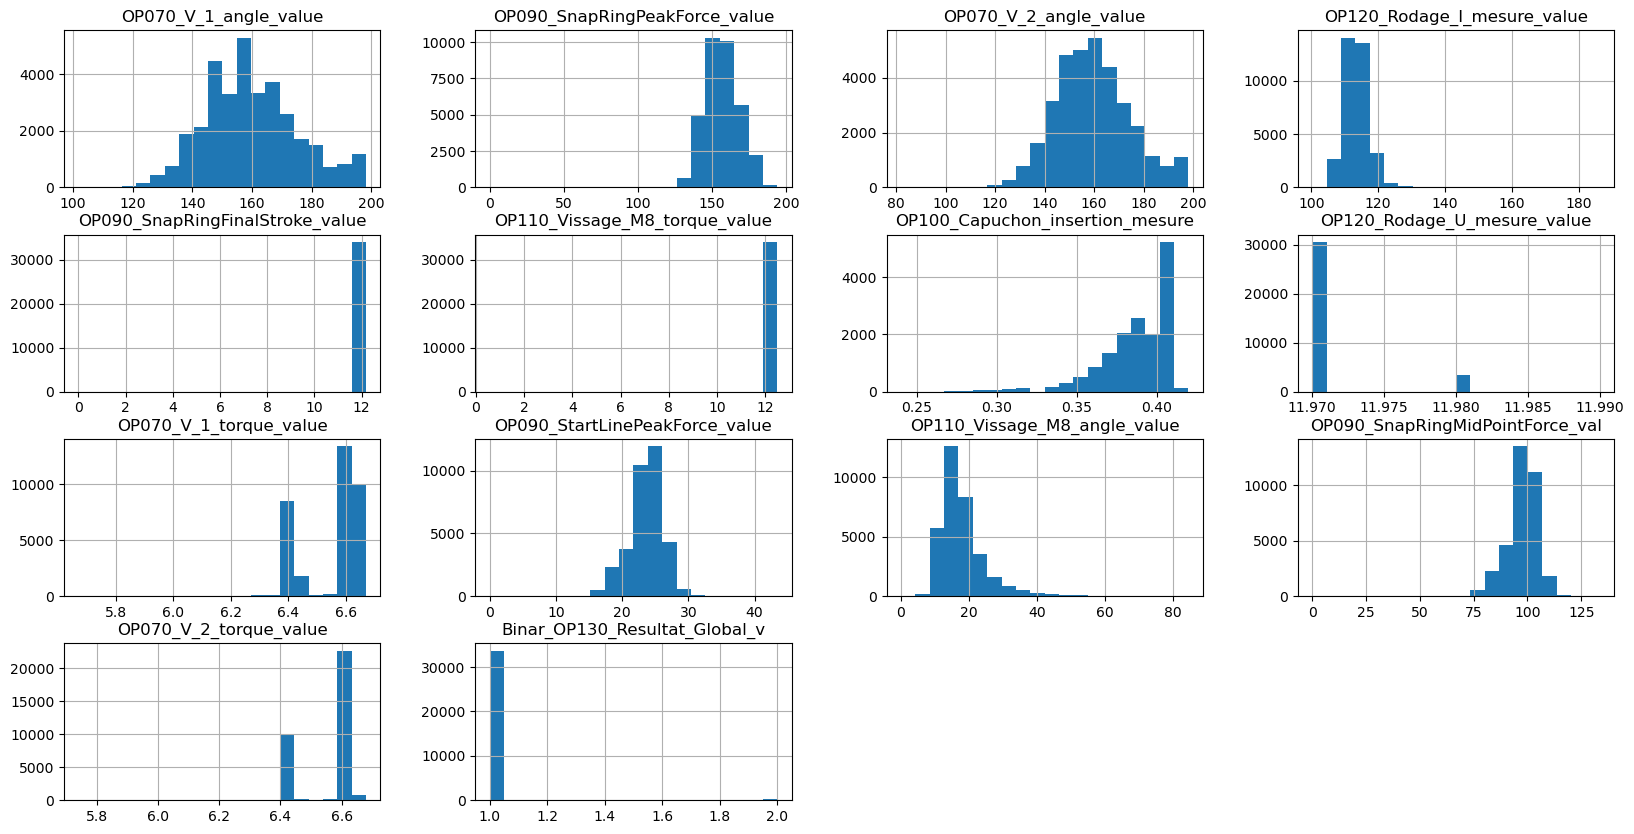

In [8]:
df.hist(figsize=(20, 10), bins=20)
plt.show();

From the visual analysis of the frequency distribution of the variables, it can be seen that there are a lot of outliers present in the data. This is going to influence the choice of algorithms used to model the binary classifier. Also, only few of the variables seem to follow a fairly normal distribution i.e. `OP070_V_1_angle_value`, `OP070_V_1_angle_value` and `OP090_StartLinePeakForce_value`. Also, the predictor variables are on different numerical scales and would either need to be scaled before modelling or algorithms that can handle skewed distributions would be chosen.

In [9]:
def add_data_labels_bar(x,y, pos):
    y_total = y.sum()
    for i in range(len(x)):
        plt.text(i + 1, y[i] + pos, f'{y[i]:,} ({round((y[i] * 100)/ y_total, 1)}%)', ha = 'center')

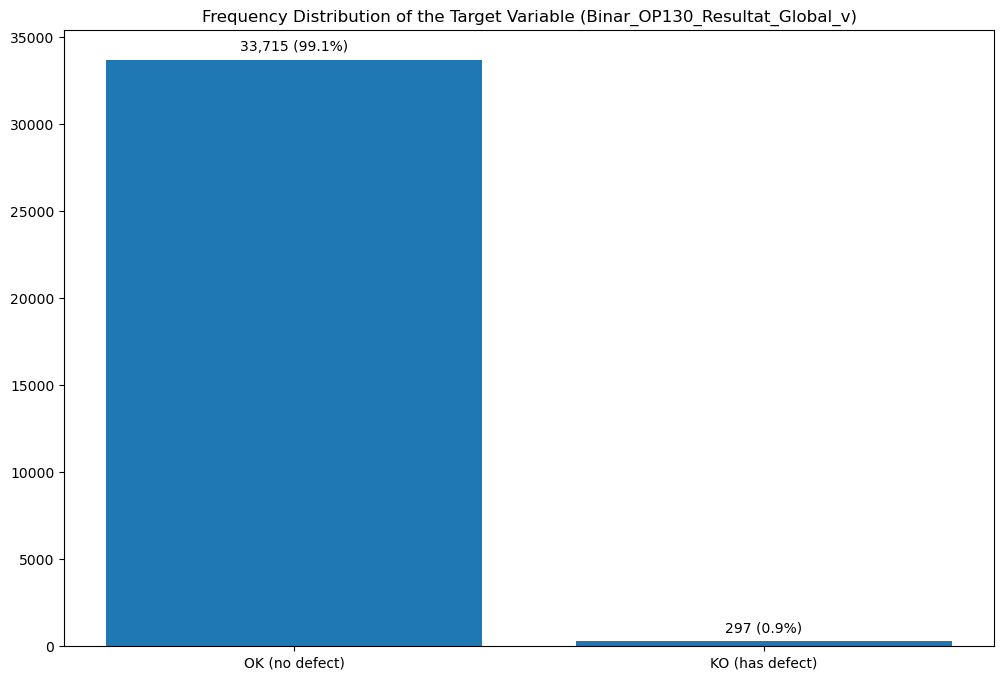

In [10]:
g = df['Binar_OP130_Resultat_Global_v'].value_counts()
plt.figure(figsize=[12, 8])
plt.bar(g.index, g.values)
add_data_labels_bar(g.index, g.values, 500)
plt.xticks([1, 2], labels=['OK (no defect)', 'KO (has defect)'])
plt.xlabel(None)
plt.title('Frequency Distribution of the Target Variable (Binar_OP130_Resultat_Global_v)')
plt.show();

The target variable is also highly imbalanced as there are very few samples of work benches that have defects.

#### Bivariate Analysis

In [11]:
df.corr()['Binar_OP130_Resultat_Global_v']

OP070_V_1_angle_value             -0.017699
OP090_SnapRingPeakForce_value     -0.010957
OP070_V_2_angle_value             -0.007069
OP120_Rodage_I_mesure_value        0.001177
OP090_SnapRingFinalStroke_value    0.014511
OP110_Vissage_M8_torque_value     -0.002529
OP100_Capuchon_insertion_mesure    0.026353
OP120_Rodage_U_mesure_value       -0.009846
OP070_V_1_torque_value            -0.039657
OP090_StartLinePeakForce_value     0.010447
OP110_Vissage_M8_angle_value       0.008177
OP090_SnapRingMidPointForce_val    0.016769
OP070_V_2_torque_value            -0.041900
Binar_OP130_Resultat_Global_v      1.000000
Name: Binar_OP130_Resultat_Global_v, dtype: float64

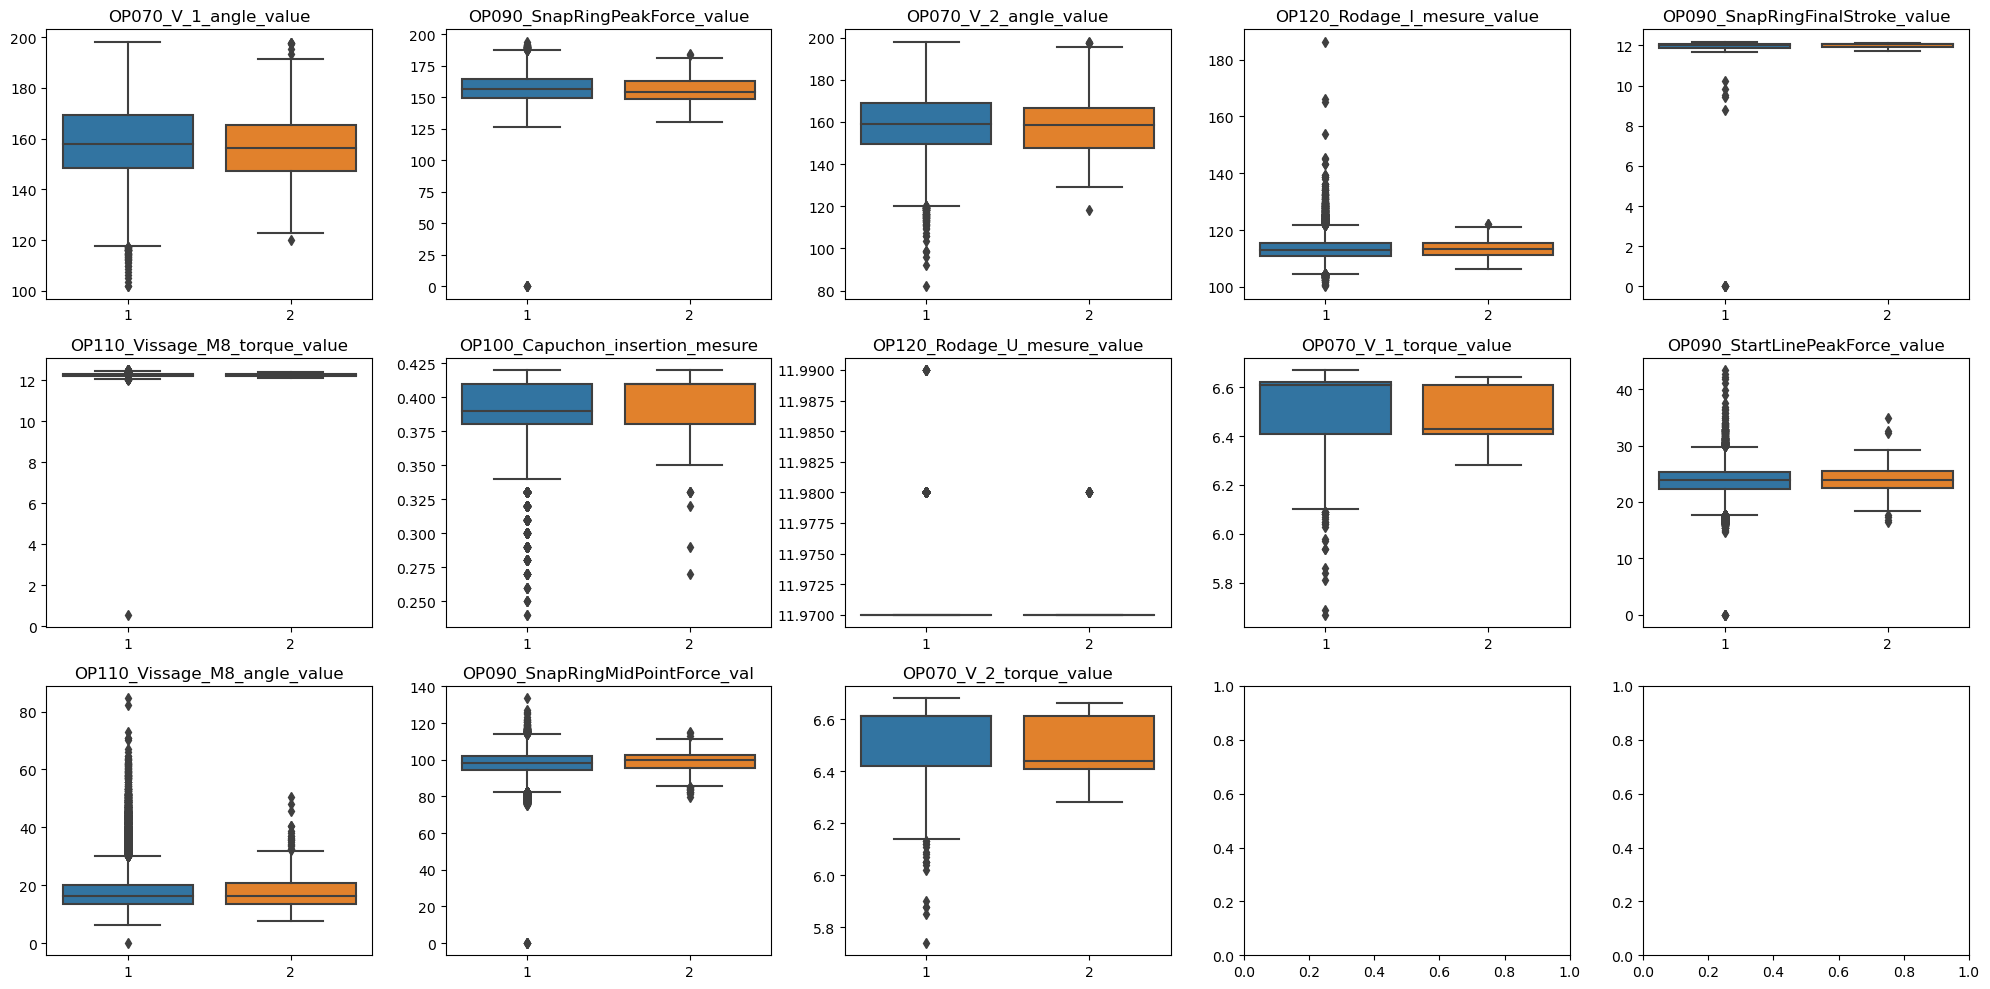

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, y = col, x = 'Binar_OP130_Resultat_Global_v', ax=axes[i])
    axes[i].set(xlabel=None)
    axes[i].set(ylabel=None)
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show();

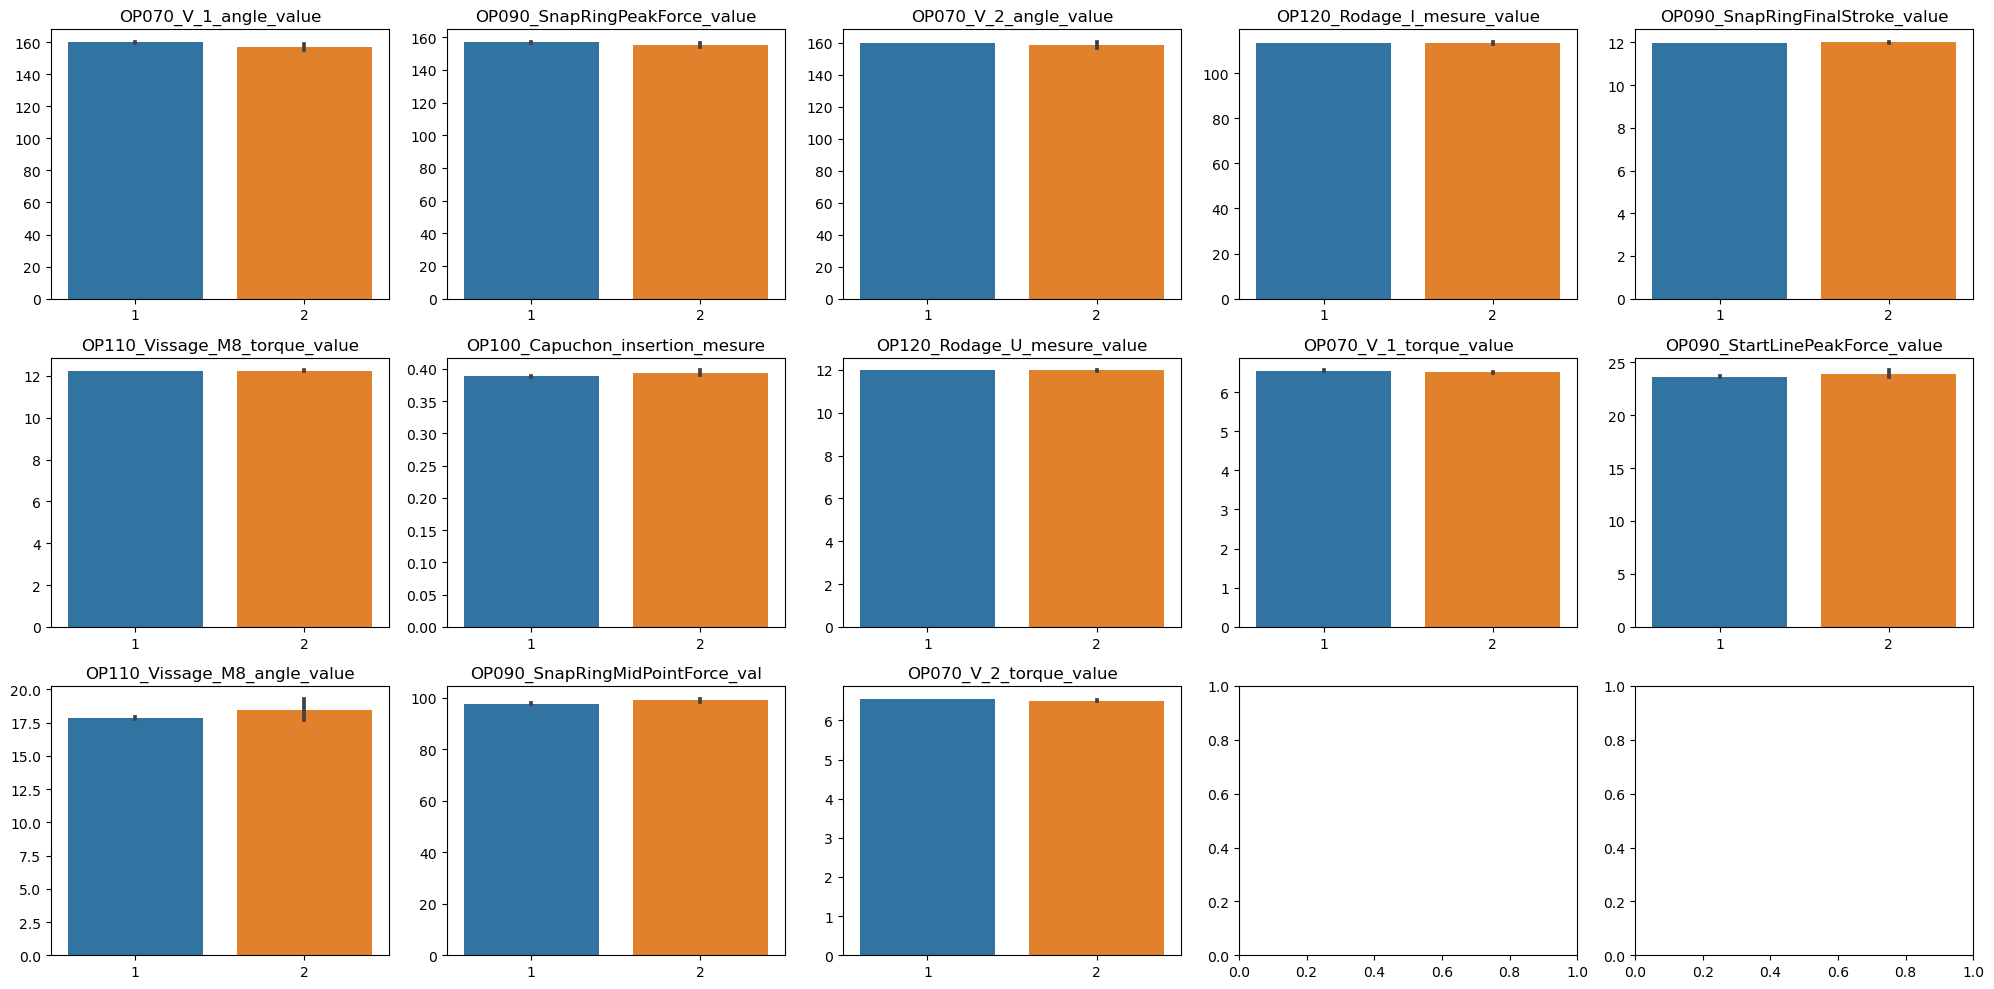

In [13]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(df.columns[:-1]):
    sns.barplot(data=df, y = col, x = 'Binar_OP130_Resultat_Global_v', ax=axes[i])
    axes[i].set(xlabel=None)
    axes[i].set(ylabel=None)
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show();

#### Multivariate Analysis

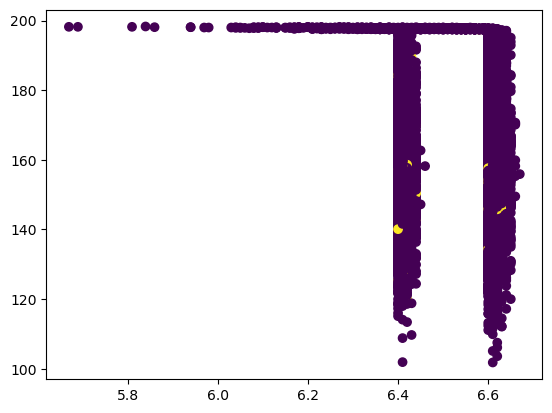

In [14]:
plt.scatter(x= df['OP070_V_1_torque_value'], y= df['OP070_V_1_angle_value'], c= df['Binar_OP130_Resultat_Global_v'])
plt.show();

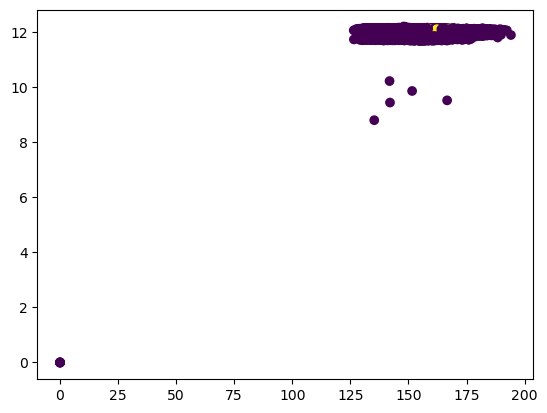

In [15]:
plt.scatter(x= df['OP090_SnapRingPeakForce_value'], y= df['OP090_SnapRingFinalStroke_value'], c= df['Binar_OP130_Resultat_Global_v'])
plt.show();

From the correlation and visual analysis, the predictor variables have little or no linear correlation with the target variable.

## Data Preparation

### Handling Data Quality Issues
In the previous stage, we observed that the `OP100_Capuchon_insertion_mesure` has 54% missing values and this doesn't have a significant correlation with the target variable. Hence, the `OP100_Capuchon_insertion_measure` variable will be dropped.

In [16]:
df.drop(columns='OP100_Capuchon_insertion_mesure', inplace=True)

To handle the outliers, algorithms that are robust to outliers and skewed distributions will be selected to solve the binary classification problem. Also, scaling the numerical features will be added as preprocessing step in the pipeline during model development.

### Recoding the Target Variable

Although the target variable currently has its classes encoded as numerical values, the current values are still unsuitable for some algorithms. For this reason, it has to be recoded.

In [17]:
df['Binar_OP130_Resultat_Global_v'].value_counts()

1    33715
2      297
Name: Binar_OP130_Resultat_Global_v, dtype: int64

In [18]:
df['Binar_OP130_Resultat_Global_v'] = np.where(df['Binar_OP130_Resultat_Global_v']==1, 0, 1)
df['Binar_OP130_Resultat_Global_v'].value_counts()

0    33715
1      297
Name: Binar_OP130_Resultat_Global_v, dtype: int64

## Modelling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [20]:
# seperate the predictor and target variables
X = df.drop(columns='Binar_OP130_Resultat_Global_v')
y = df['Binar_OP130_Resultat_Global_v']
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### Model Selection

In [21]:
models = [('DT', DecisionTreeClassifier(random_state=1)), ('RF', RandomForestClassifier(random_state=1))\
          , ('XGB', XGBClassifier(random_state=1)), ('GB', GradientBoostingClassifier(random_state=1))]

In [29]:
# evaluate each model using cross-validation
model_scores = {}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for name, model in models:
    steps = [('scaler', StandardScaler()), ('model', model)]
    pl = Pipeline(steps=steps)
    scores = cross_val_score(pl, X_train, y_train, cv=cv, scoring='f1')
    model_scores[name] = scores
    print(f'{name}: {scores.mean()}')

DT: 0.01865759039672083
RF: 0.0
XGB: 0.0
GB: 0.0


In [30]:
# evaluate each model using cross-validation
model_scores = {}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for name, model in models:
    steps = [('sampler', SMOTE()), ('model', model)]
    pl = Pipeline(steps=steps)
    scores = cross_val_score(pl, X_train, y_train, cv=cv, scoring='f1')
    model_scores[name] = scores
    print(f'{name}: {scores.mean()}')

DT: 0.026273306322666667
RF: 0.014835164835164833
XGB: 0.0
GB: 0.029882150369499382


In [31]:
# evaluate each model using cross-validation
model_scores = {}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for name, model in models:
    steps = [('sampler', SMOTE()),('scaler', StandardScaler()), ('model', model)]
    pl = Pipeline(steps=steps)
    scores = cross_val_score(pl, X_train, y_train, cv=cv, scoring='f1')
    model_scores[name] = scores
    print(f'{name}: {scores.mean()}')

DT: 0.014009900085849453
RF: 0.0150997150997151
XGB: 0.0
GB: 0.03487590748511038


##### Random Forest Classifier

In [ ]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred_rf = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6744
           1       0.00      0.00      0.00        59

    accuracy                           0.99      6803
   macro avg       0.50      0.50      0.50      6803
weighted avg       0.98      0.99      0.99      6803



c:\Users\Owner\anaconda3\envs\genai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Owner\anaconda3\envs\genai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Owner\anaconda3\envs\genai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
roc_auc_score(y_test, y_pred_rf)

0.5

In [ ]:
confusion_matrix(y_test, y_pred_rf)

array([[6744,    0],
       [  59,    0]], dtype=int64)

##### Random Forest with Sampling and Scaling Preprocessing

In [33]:
steps = [('sampler', SMOTE()),('scaler', StandardScaler()), ('model', RandomForestClassifier(random_state=1))]
rf_pl = Pipeline(steps=steps)
rf_pl.fit(X_train, y_train)
y_pred_rf_pl = rf_pl.predict(X_test)
print(classification_report(y_test, y_pred_rf_pl))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6744
           1       0.00      0.00      0.00        59

    accuracy                           0.99      6803
   macro avg       0.50      0.50      0.50      6803
weighted avg       0.98      0.99      0.99      6803



In [34]:
confusion_matrix(y_test, y_pred_rf_pl)

array([[6738,    6],
       [  59,    0]], dtype=int64)

##### Decision Tree Classifier

In [35]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [37]:
y_pred_dt = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print('roc_auc_score:', roc_auc_score( y_test, y_pred_dt))
confusion_matrix(y_test, y_pred_dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6744
           1       0.00      0.00      0.00        59

    accuracy                           0.98      6803
   macro avg       0.50      0.49      0.49      6803
weighted avg       0.98      0.98      0.98      6803

roc_auc_score: 0.4941429418742586


array([[6665,   79],
       [  59,    0]], dtype=int64)